# Predict the Criminal with Ensemble

Ensemble modeling is a powerful way to improve the performance of your model. It usually pays off to apply ensemble learning over and above various models you might be building. 

## Import Libraries

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
%matplotlib inline

## Get the Data

In [26]:
train = pd.read_csv('criminal_train.csv')
test = pd.read_csv('criminal_test.csv')

In [27]:
train.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [28]:
test.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


## Exploratory Data Analysis

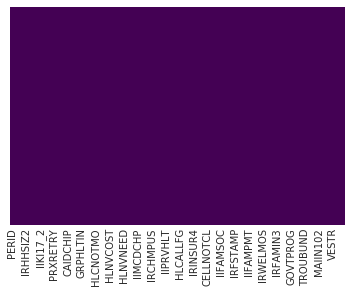

In [29]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Train data do not have any Null values

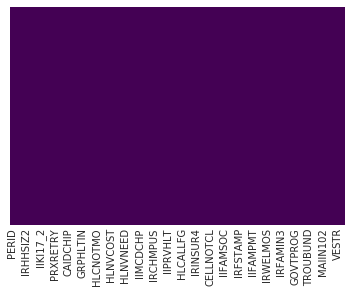

In [30]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Test data do not have any Null values

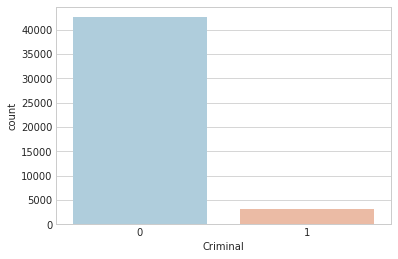

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Criminal',data=train,palette='RdBu_r')

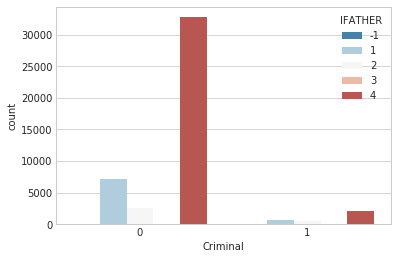

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Criminal',hue='IFATHER',data=train,palette='RdBu_r')

### Count Unique features

In [33]:
feats_counts = train.nunique(dropna=False)

In [34]:
feats_counts.sort_values()[:10]

Criminal    2
IRFAMSSI    3
IIFAMSOC    3
IRFAMSOC    3
OTHINS      3
IIINSUR4    3
IRMCDCHP    3
IIMCDCHP    3
IRMEDICR    3
IIMEDICR    3
dtype: int64

# Data Cleaning
## For Duplicate Columns

In [35]:
train_enc = pd.DataFrame(index= train.index)

In [36]:
for col in tqdm_notebook(train.columns):
    train_enc[col] = train[col].factorize()[0]

In [37]:
dup_col = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i+1 :]:
        if c2 not in dup_col and np.all(train_enc[c1] == train_enc[c2]):
            dup_col[c2]=c1

In [38]:
dup_col

{'HLCALL99': 'HLCALLFG'}

In [39]:
train.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


##  Drop Duplicte Columns

In [40]:
train.drop('PERID', axis=1,inplace=True)

In [41]:
train.drop("HLCALL99",axis=1,inplace=True)
test.drop("HLCALL99",axis=1, inplace=True)

In [42]:
train.shape

(45718, 70)

In [43]:
test.shape

(11430, 70)

In [44]:
nunique = train.nunique()

# Building a Model
## Train-Test Split
Split the data into Training testing set

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = train.drop('Criminal', axis=1)
y = train['Criminal']
training, valid, ytraning, yvalid = train_test_split(X, y, test_size=0.5)

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

### Useing Random Forest and XGBClassifier

In [53]:
model1 = RandomForestClassifier(n_estimators=100)
model2 = XGBClassifier()

### Training both the models

In [54]:
model1.fit(training, ytraning)
model2.fit(training, ytraning)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [55]:
pred1 = model1.predict(valid)
pred2 = model2.predict(valid)

In [56]:
X_test = test.drop('PERID', axis=1)

In [57]:
test_pred1 = model1.predict(X_test)

In [58]:
test_pred2 = model2.predict(X_test)

### Stacking both the predictions

In [59]:
stacked_pred = np.column_stack((pred1, pred2))
stacked_pred_test = np.column_stack((test_pred1, test_pred2))

### Use of meta model Random Forest for final prediction

In [60]:
meta_model = RandomForestClassifier(n_estimators=100, max_depth=3)

In [61]:
meta_model.fit(stacked_pred, yvalid)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
final_prediction = meta_model.predict(stacked_pred_test)

### Metamodel Score

In [63]:
meta_model.score(stacked_pred, yvalid)

0.95389124633623523

## Result file into .csv

In [ ]:
submission = pd.DataFrame({    
    "PERID": test["PERID"],
    "Criminal": bagged_predictions,
    })
submission.to_csv('Result4.csv', index=False, columns=['PERID', 'Criminal'])

In [ ]:
bagged_predictions